# Class 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plot
import seaborn as sns

In [ ]:
data_frame = pd.read_csv("csv/advertising.csv", index_col=0)

In [ ]:
sns.pairplot(data_frame, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"])

In [ ]:
sns.heatmap(data_frame.corr(), annot=True)

In [ ]:
x = data_frame.drop("Sales", axis=1)
y = data_frame["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train);

In [ ]:
c = lr.intercept_
m = lr.coef_

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(mae, mse)

# Class 3

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_frame = pd.read_csv("csv/dataset.csv")
column_names = data_frame.columns

In [ ]:
# Trying to remove any kind of "?" symbol with mode of that column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_with_qn = data_frame.columns[data_frame.isin(["?"]).any()]

for cols in columns_with_qn:
    mode_value = data_frame[cols].mode()[0]
    data_frame.loc[data_frame[cols] == "?", cols] = mode_value

    data_frame[cols] = le.fit_transform(data_frame[cols])


# Class 5

In [ ]:
# Removing outliers from data_frame [Requirement = Class 3]

for col in column_names:
    q1 = data_frame[col].quantile(0.25)
    q3 = data_frame[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + iqr * 1.5
    lower_limit = q1 - iqr * 1.5
    data_frame[col] = np.clip(data_frame[col], upper_limit, lower_limit)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report
import pprint

In [ ]:
sc = StandardScaler()
lr = LogisticRegression()
pp = pprint.PrettyPrinter()

In [ ]:
x = data_frame.drop("target", axis=1)
y = data_frame.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = sc.fit_transform(X=x_train)
x_test = sc.transform(X=x_test)

In [ ]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print(accuracy, precision, f1score, recall)

In [ ]:
report = classification_report(y_test,y_pred)

pp.pprint(report)

# Class 7

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standard scaler is required to make mean=0 and SD=1
sc = StandardScaler()

In [55]:
iris = load_iris()
x = iris.data

In [56]:
x = sc.fit_transform(x)

In [66]:
# Determining which will be best

wcss = []

for i in range(1, 10):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmean.fit(X=x)
    wcss.append(kmean.inertia_)

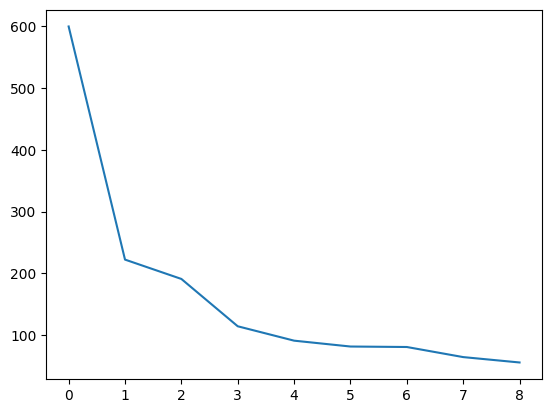

In [67]:
plot.plot(wcss)

# Class 8